<a href="https://colab.research.google.com/github/qashrabany/23292424_Assignment2/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing 

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 9ba3746ce01443038dfe6f3f0f297521.R73QV3hVZ-nlPjIiDniP9H9C


## 📦 Setup and Configuration
Import required packages and setup environment.

In [4]:
!pip install pyinputplus
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=d3dfe94a1cee8e5d64aa06d3d8fa0e8e664704b8c328e5d230ca1c7bd54f8556
  Stored in directory: /root/.cache/pip/wheels/85/81/c1/325c8199c5c4de8a0b9af900ff9cd8bd69853e3d9419493512
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=caf3d61d57c1c36f373f393fde1cb04a85b2ec77c0eadd1c89f9a782ddda95e1
  Stored in directory: /root/.cache/pip/wheels/09/de/18/4dd2be0dbdf31870c6f0abde43b0de197b1c095655ad7da5c2
  Created wheel for stdiomask: filename=stdiomask

## 🌤️ Weather Data Functions

In [5]:
import requests

def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather data for a specified location using wttr.in.

    Args:
        location (str): City or location name (e.g. "London", "Paris", "Perth")
        forecast_days (int): Number of days to forecast (1–5)

    Returns:
        dict: Weather data including current conditions and forecast, or None if error.
    """
    # constrain forecast_days between 1 and 5
    if forecast_days < 1:
        forecast_days = 1
    elif forecast_days > 5:
        forecast_days = 5
    url = f"https://wttr.in/{location}?format=j1"

    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"Error fetching weather data: {e}")
        return None

    data = response.json()
    current = data.get("current_condition", [])
    if current:
        current = current[0]
    else:
        current = {}

    # Extract forecast days
    forecast = []
    weather_list = data.get("weather", [])
    for day in weather_list[:forecast_days]:
        # You can extract whichever fields you prefer; here's an example subset:
        day_info = {
            "date": day.get("date"),
            "maxtempC": day.get("maxtempC"),
            "mintempC": day.get("mintempC"),
            "avgtempC": day.get("avgtempC"),
            "sunrise": None,
            "sunset": None,
            "hourly": day.get("hourly", [])
        }
        # astronomy info is a list; usually one element
        astro = day.get("astronomy", [])
        if astro:
            astro0 = astro[0]
            day_info["sunrise"] = astro0.get("sunrise")
            day_info["sunset"] = astro0.get("sunset")

        forecast.append(day_info)

    result = {
        "location": location,
        "current": {
            "temp_C": current.get("temp_C"),
            "weatherDesc": current.get("weatherDesc", [{}])[0].get("value"),
            "humidity": current.get("humidity"),
            "FeelsLikeC": current.get("FeelsLikeC"),
            "windspeedKmph": current.get("windspeedKmph"),
            "precipMM": current.get("precipMM"),
            # you can add more as you wish
        },
        "forecast": forecast
    }

    return result




## 📊 Visualisation Functions

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def create_temperature_visualisation(weather_data, date_range=None, output_type='display'):
    """
    Create a visualisation of temperature data across a date range.

    Args:
        weather_data (dict): The processed weather data from get_weather_data()
        date_range (tuple/list): Optional start and end date ("YYYY-MM-DD", "YYYY-MM-DD")
        output_type (str): 'display' to show in notebook or 'figure' to return the matplotlib figure

    Returns:
        matplotlib.figure.Figure if output_type == 'figure', else None
    """
    if not weather_data or "forecast" not in weather_data:
        print("No forecast data available.")
        return None

    forecast = weather_data["forecast"]

    # Convert forecast list to DataFrame for easy filtering
    df = pd.DataFrame(forecast)

    # Ensure temperatures are numeric
    for col in ["maxtempC", "mintempC", "avgtempC"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Filter by date range if provided
    if date_range:
        start_date, end_date = pd.to_datetime(date_range[0]), pd.to_datetime(date_range[1])
        df["date"] = pd.to_datetime(df["date"])
        df = df[(df["date"] >= start_date) & (df["date"] <= end_date)]

    if df.empty:
        print("No data found for the given date range.")
        return None

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(df["date"], df["maxtempC"], marker="o", label="Max Temp (°C)", color="red")
    ax.plot(df["date"], df["mintempC"], marker="o", label="Min Temp (°C)", color="blue")
    ax.plot(df["date"], df["avgtempC"], marker="o", label="Avg Temp (°C)", color="green")

    ax.set_title(f"Temperature Forecast for {weather_data['location']}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)

    plt.xticks(rotation=45)

    # Return or display
    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None


In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create a visualisation of precipitation data across forecast days.

    Args:
        weather_data (dict): The processed weather data from get_weather_data()
        output_type (str): 'display' to show in notebook or 'figure' to return the matplotlib figure

    Returns:
        matplotlib.figure.Figure if output_type == 'figure', else None
    """
    if not weather_data or "forecast" not in weather_data:
        print("No forecast data available.")
        return None

    forecast = weather_data["forecast"]

    # Build a daily summary DataFrame
    rows = []
    for day in forecast:
        date = day.get("date")
        hourly = day.get("hourly", [])

        # Convert to DataFrame for easier aggregation
        df_hourly = pd.DataFrame(hourly)

        if not df_hourly.empty:
            df_hourly["precipMM"] = pd.to_numeric(df_hourly.get("precipMM"), errors="coerce")
            df_hourly["chanceofrain"] = pd.to_numeric(df_hourly.get("chanceofrain"), errors="coerce")

            daily_precip = df_hourly["precipMM"].sum()  # total rainfall for the day
            avg_chance = df_hourly["chanceofrain"].mean()  # average chance of rain
        else:
            daily_precip, avg_chance = 0, 0

        rows.append({"date": date, "precipMM": daily_precip, "chanceofrain": avg_chance})

    df = pd.DataFrame(rows)

    if df.empty:
        print("No precipitation data available.")
        return None

    # Plot precipitation
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar chart for precipitation (mm)
    ax1.bar(df["date"], df["precipMM"], color="blue", alpha=0.6, label="Total Precipitation (mm)")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Precipitation (mm)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Line chart for chance of rain (%) on secondary axis
    ax2 = ax1.twinx()
    ax2.plot(df["date"], df["chanceofrain"], marker="o", color="green", label="Chance of Rain (%)")
    ax2.set_ylabel("Chance of Rain (%)", color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    # Titles and grid
    plt.title(f"Precipitation Forecast for {weather_data['location']}")
    fig.autofmt_xdate()
    ax1.grid(True, linestyle="--", alpha=0.6)

    # Legends
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    # Return or display
    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None


## 🤖 Natural Language Processing

In [18]:
import re
import datetime

def parse_weather_question(question):
    question = question.lower().strip()

    # Detect question type
    if re.search(r"\bweather\b", question):
        question_type = "weather"
    else:
        question_type = "unknown"

    # Detect attribute
    if "rain" in question or "precipitation" in question:
        attribute = "precipitation"
    elif "temperature" in question or "hot" in question or "cold" in question:
        attribute = "temperature"
    else:
        attribute = "general"

    # Detect time → map to days_ahead
    if "today" in question:
        days_ahead = 0
    elif "tomorrow" in question:
        days_ahead = 1
    elif "day after tomorrow" in question:
        days_ahead = 2
    else:
        days_ahead = 0  # fallback

    # Extract location (remove keywords)
    location = (question.replace("what", "")
                        .replace("is", "")
                        .replace("the", "")
                        .replace("weather", "")
                        .replace("of", "")
                        .replace("today", "")
                        .replace("tomorrow", "")
                        .replace("day after tomorrow", "")
                        .replace("rain", "")
                        .replace("precipitation", "")
                        .replace("temperature", "")
                        .replace("in", "")
                        .strip().title())

    return {
        "question_type": question_type,
        "attribute": attribute,
        "days_ahead": days_ahead,
        "location": location
    }

# Example
# print(parse_weather_question("What is the temperature of Perth tomorrow?"))


{'question_type': 'unknown', 'attribute': 'temperature', 'days_ahead': 1, 'location': 'Perth ?'}


## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [9]:
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    location = parsed_question["location"]
    attribute = parsed_question["attribute"]
    days_ahead = parsed_question["days_ahead"]

    forecast = weather_data.get("forecast", [])
    if days_ahead >= len(forecast):
        return f"Sorry, I only have forecast data for {len(forecast)} days ahead."

    if days_ahead == 0:
        target_day = "today"
    elif days_ahead == 1:
        target_day = "tomorrow"
    else:
        target_day = f"in {days_ahead} days"

    day_data = forecast[days_ahead]

    if attribute == "temperature":
        print(create_temperature_visualisation(weather_data))
        return (f"The forecasted temperature {target_day} in {location} is "
                f"{day_data['mintempC']}°C - {day_data['maxtempC']}°C "
                f"(average {day_data['avgtempC']}°C).")

    elif attribute == "precipitation":
        print(create_precipitation_visualisation(weather_data))
        total_precip = sum(float(h.get("precipMM", 0)) for h in day_data["hourly"])
        return (f"The total expected rainfall {target_day} in {location} "
                f"is {total_precip:.1f} mm.")
    elif attribute == "humidity":
        avg_humidity = sum(int(h.get("humidity", 0)) for h in day_data["hourly"]) / len(day_data["hourly"])
        return (f"The average humidity {target_day} in {location} will be about {avg_humidity:.0f}%.")
    elif attribute == "wind":
        avg_wind = sum(int(h.get("windspeedKmph", 0)) for h in day_data["hourly"]) / len(day_data["hourly"])
        return (f"The average wind speed {target_day} in {location} will be about {avg_wind:.0f} km/h.")
    else:
        return f"Sorry, I couldn't understand the weather attribute in your question."

    return {
        "location": location,
        "days_ahead": days_ahead,
        "attribute": attribute
    }


## 🧪 Testing and Examples

🌤️ Weather Assistant
Ask me about the weather (e.g., ''):
> what is the temperature of perth today
{'question_type': 'unknown', 'attribute': 'temperature', 'days_ahead': 0, 'location': 'Perth'}


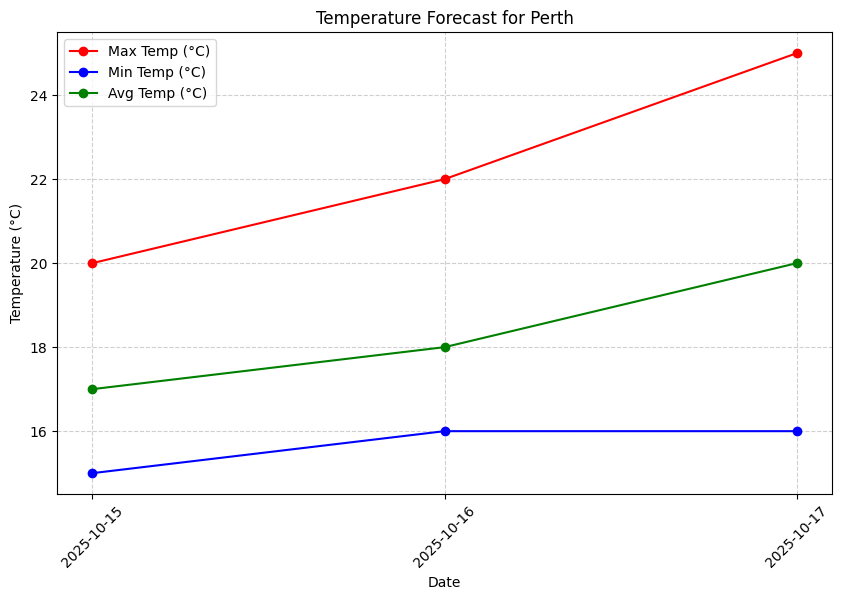

None

👉 The forecasted temperature today in Perth is 15°C - 20°C (average 17°C).


In [19]:
# Include sample input/output for each function
def main():
    print("🌤️ Weather Assistant")
    question = input("Ask me about the weather (e.g., ''):\n> ")

    parsed = parse_weather_question(question)
    print(parsed)
    weather_data = get_weather_data(parsed["location"], forecast_days=3)  # max 3 with wttr.in
    if not weather_data:
        print("Could not fetch weather data.")
        return

    response = generate_weather_response(parsed, weather_data)
    print("\n👉 " + response)


# Example run
if __name__ == "__main__":
    main()


## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.